In [123]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


Valores totais: 


Class
3    1696
1    1657
2    1647
Name: count, dtype: int64

<Axes: >

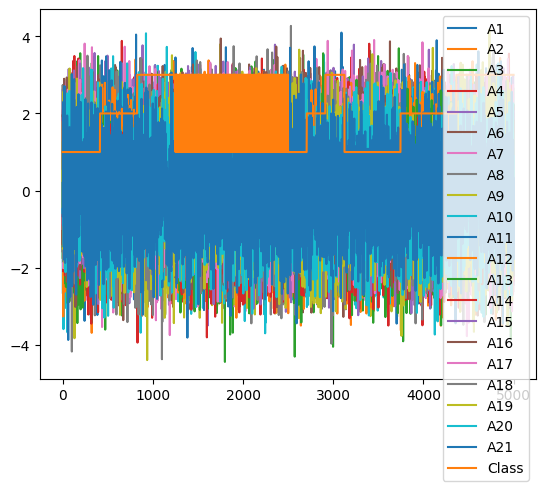

In [124]:
#DF
df = pd.read_csv('WDVG.csv')
#display(df)
print('Valores totais: ')
display((df.iloc[:, -1]).value_counts())

df.plot()

x = df.iloc[:, :-1]  # Todos exceto a última coluna
y = df.iloc[:, -1]   # última coluna

In [125]:
# CLASSIFICADORES


acuracia_melhor_knn=[]
acuracia_melhor_arvore = []
acuracia_melhor_svm = []
acuracia_melhor_mlp = []
acuracia_naive_bayes = []

proba_knn = []
proba_arvore = [] 
proba_svm = []
proba_mlp = []
proba_nb = []


loop = 2
for i in range(loop):

    print("\n\nExecução: ", i+1)
    
    #CALIBRAGEM
    print("\nCalibragem-", i+1)
    
    x = df.iloc[:, :-1]  # Todos exceto a última coluna
    y = df.iloc[:, -1]   # última coluna

    # 70% para treinamento - 15% para validação - 15% para teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, shuffle = True)
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)

    #KNN


    # Defina os hiperparâmetros que deseja otimizar
    param_grid = {
        'n_neighbors': list(range(1, 50)),  # Valores de k
        'weights': ['uniform', 'distance'],  # Tipo de ponderação
        'metric': ["euclidean", "manhattan"]  # Métrica de distância (1 para distância Manhattan, 2 para distância Euclidiana)
    }

    best_accuracy = 0  # melhor acurácia
    best_paramsKNN = {}  # melhores hiperparâmetros

    for n_neighbors in param_grid['n_neighbors']:
        for weights in param_grid['weights']:
            for metric in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
                knn.fit(x_treino, y_treino)
                opiniao = knn.predict(x_validacao)
                accuracy = accuracy_score(y_validacao, opiniao)
                #print("Acc: ", accuracy)

                if accuracy > best_accuracy:

                    best_accuracy = accuracy
                    best_paramsKNN = {
                        'n_neighbors': n_neighbors,
                        'weights': weights,
                        'metric': metric
                    }

    #print(f"Melhores Hiperparâmetros: {best_paramsKNN}")
    #print("Acc: ", best_accuracy)




    ##AD -maior profundidade - número mínimo de chaves por folha - critério (gini ou entropy)

    param_grid = {
        'max_depth': list(range(1, 21)),  # Profundidade da árvore
        'min_samples_leaf': list(range(1, 11)),  # Número mínimo de amostras por folha
        'criterion': ['gini', 'entropy'],  # Critério de divisão da árvore
        'min_samples_split': list(range(2, 11))  # Número mínimo de amostras para dividir um nó
    }

    best_accuracy = 0  # Melhor acurácia

    for max_depth in param_grid['max_depth']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for criterion in param_grid['criterion']:
                for min_samples_split in param_grid['min_samples_split']:
                    dt_classifier = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_leaf=min_samples_leaf,
                        criterion=criterion,
                        min_samples_split=min_samples_split
                    )
                    dt_classifier.fit(x_treino, y_treino)
                    opiniao = dt_classifier.predict(x_validacao)
                    accuracy = accuracy_score(y_validacao, opiniao)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_paramsAD = {
                            'max_depth': max_depth,
                            'min_samples_leaf': min_samples_leaf,
                            'criterion': criterion,
                            'min_samples_split': min_samples_split
                        }




    #print(f"Melhores Hiperparâmetros: {best_paramsAD}")
    #print("Melhor Acurácia: ", best_accuracy)



    #SVM - SVM -tipo do kernel (linear, rbf, polinomial, sigmoid), variação do erro C (entre 0.1 e 1)
    # Defina os hiperparâmetros que deseja otimizar
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
        'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]  # Variação do parâmetro C
    }

    best_accuracy = 0  # melhor acurácia
    best_paramsSVM = {}  # melhores hiperparâmetros

    loop = 0
    for kernel in param_grid['kernel']:
        for C in param_grid['C']:
            svm = SVC(kernel=kernel, C=C)
            svm.fit(x_treino, y_treino)
            opiniao = svm.predict(x_validacao)
            accuracy = accuracy_score(y_validacao, opiniao)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_paramsSVM = {
                    'kernel': kernel,
                    'C': C
                }

    #print("Melhores Hiperparâmetros:", best_paramsSVM)
    #print("Melhor Acuracia: ", best_accuracy )

    #MLP - número de épocas,taxa de aprendizagem, função de ativação (relu, sigmoid, tangente hiperbólica, logística) e número de camadas escondidas
    # Defina o param_grid com as combinações de hiperparâmetros
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,)],
        'activation': ['relu', 'logistic', 'tanh', 'identity'],
        'solver': ['adam'],
        'max_iter': [100, 200, 300],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }

    best_accuracy = 0
    best_paramsMLP = {}

    # Itere sobre as combinações de hiperparâmetros
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    # Crie um classificador MLP com os hiperparâmetros
                    mlp = MLPClassifier(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )

                    mlp.fit(x_treino, y_treino)

                    opiniao = mlp.predict(x_validacao)

                    accuracy = accuracy_score(y_validacao, opiniao)

                    # Verifique se a acurácia é a melhor até agora
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }

    # Exiba os melhores hiperparâmetros encontrados
    #print("Melhores Hiperparâmetros:", best_paramsMLP)
    #print("Melhor Acuracia: ", best_accuracy )

    #TREINAMENTO


    print("\nTreinamento-", i+1)



    #KNN
    knn = KNeighborsClassifier(
                    n_neighbors=best_paramsKNN['n_neighbors'],
                    weights=best_paramsKNN['weights'],
                    metric=best_paramsKNN['metric']
                    )
    knn.fit(x_treino, y_treino)
    opiniao = knn.predict(x_teste)  
    acuracia_melhor_knn.append(accuracy_score(y_teste, opiniao))
    proba_knn.append(knn.predict_proba(x_teste))



    #Árvore de decisão
    arvoreDecisao = DecisionTreeClassifier(
                        max_depth=best_paramsAD['max_depth'],
                        min_samples_leaf=best_paramsAD['min_samples_leaf'],
                        criterion=best_paramsAD['criterion'],
                        min_samples_split=best_paramsAD['min_samples_split']
                    )
    arvoreDecisao.fit(x_treino, y_treino)
    opiniao = arvoreDecisao.predict(x_teste)
    acuracia_melhor_arvore.append(accuracy_score(y_teste, opiniao))
    proba_arvore.append(arvoreDecisao.predict_proba(x_teste)) 




    #NaiveBayes
    naive_bayes = GaussianNB()
    grid_search = GridSearchCV(estimator=naive_bayes, param_grid={}, scoring='accuracy')
    grid_search.fit(x_treino, y_treino)
    nBayes = grid_search.best_estimator_
    opiniao = nBayes.predict(x_teste)
    acuracia_naive_bayes.append(accuracy_score(y_teste, opiniao))
    proba_nb.append(nBayes.predict_proba(x_teste))


    
    #SVM
    svm = SVC(
            kernel=best_paramsSVM['kernel'],
            C=best_paramsSVM['C'],
            probability=True
            )
    svm.fit(x_treino, y_treino)
    opiniao = svm.predict(x_teste)
    acuracia_melhor_svm.append(accuracy_score(y_teste, opiniao))
    a = svm.predict_proba(x_teste)
    proba_svm.append(a)



    #MLP
    mlp = MLPClassifier(
                        hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                        activation=best_paramsMLP['activation'],
                        solver='adam',
                        max_iter=best_paramsMLP['max_iter'],
                        learning_rate_init=best_paramsMLP['learning_rate_init']
                    )
    mlp.fit(x_treino, y_treino)
    opiniao = mlp.predict(x_teste)
    acuracia_melhor_mlp.append(accuracy_score(y_teste, opiniao))
    proba_mlp.append(svm.predict_proba(x_teste))

    print("\nAcuracias:")
    print("KNN: ", *acuracia_melhor_knn, sep=" | ")
    print("AD: ", *acuracia_melhor_arvore, sep=" | ")
    print("NV: ", *acuracia_naive_bayes, sep=" | ")
    print("SVM: ", *acuracia_melhor_svm, sep=" | ")
    print("MLP: ", *acuracia_melhor_mlp, sep=" | ")








Execução:  1

Calibragem- 1


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='manhattan')

KNeighborsClassifier(metric='euclidean', weights='distance')

KNeighborsClassifier(metric='manhattan', weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

KNeighborsClassifier(metric='euclidean', n_neighbors=8, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

KNeighborsClassifier(metric='euclidean', n_neighbors=12, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

KNeighborsClassifier(metric='euclidean', n_neighbors=13, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=13, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

KNeighborsClassifier(metric='euclidean', n_neighbors=14, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

KNeighborsClassifier(metric='euclidean', n_neighbors=15, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=16)

KNeighborsClassifier(metric='manhattan', n_neighbors=16)

KNeighborsClassifier(metric='euclidean', n_neighbors=16, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=16, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=17)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

KNeighborsClassifier(metric='euclidean', n_neighbors=17, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

KNeighborsClassifier(metric='manhattan', n_neighbors=18)

KNeighborsClassifier(metric='euclidean', n_neighbors=18, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=18, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

KNeighborsClassifier(metric='manhattan', n_neighbors=20)

KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=20, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

KNeighborsClassifier(metric='manhattan', n_neighbors=21)

KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=21, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

KNeighborsClassifier(metric='manhattan', n_neighbors=22)

KNeighborsClassifier(metric='euclidean', n_neighbors=22, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=22, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

KNeighborsClassifier(metric='manhattan', n_neighbors=23)

KNeighborsClassifier(metric='euclidean', n_neighbors=23, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=23, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=24)

KNeighborsClassifier(metric='manhattan', n_neighbors=24)

KNeighborsClassifier(metric='euclidean', n_neighbors=24, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=25)

KNeighborsClassifier(metric='manhattan', n_neighbors=25)

KNeighborsClassifier(metric='euclidean', n_neighbors=25, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=25, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

KNeighborsClassifier(metric='manhattan', n_neighbors=26)

KNeighborsClassifier(metric='euclidean', n_neighbors=26, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=26, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

KNeighborsClassifier(metric='manhattan', n_neighbors=27)

KNeighborsClassifier(metric='euclidean', n_neighbors=27, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=28)

KNeighborsClassifier(metric='manhattan', n_neighbors=28)

KNeighborsClassifier(metric='euclidean', n_neighbors=28, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=28, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

KNeighborsClassifier(metric='manhattan', n_neighbors=29)

KNeighborsClassifier(metric='euclidean', n_neighbors=29, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=29, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

KNeighborsClassifier(metric='manhattan', n_neighbors=30)

KNeighborsClassifier(metric='euclidean', n_neighbors=30, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=30, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=31)

KNeighborsClassifier(metric='manhattan', n_neighbors=31)

KNeighborsClassifier(metric='euclidean', n_neighbors=31, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=31, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=32)

KNeighborsClassifier(metric='manhattan', n_neighbors=32)

KNeighborsClassifier(metric='euclidean', n_neighbors=32, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=32, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=33)

KNeighborsClassifier(metric='manhattan', n_neighbors=33)

KNeighborsClassifier(metric='euclidean', n_neighbors=33, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=33, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=34)

KNeighborsClassifier(metric='manhattan', n_neighbors=34)

KNeighborsClassifier(metric='euclidean', n_neighbors=34, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=34, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=35)

KNeighborsClassifier(metric='manhattan', n_neighbors=35)

KNeighborsClassifier(metric='euclidean', n_neighbors=35, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=35, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=36)

KNeighborsClassifier(metric='manhattan', n_neighbors=36)

KNeighborsClassifier(metric='euclidean', n_neighbors=36, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=37)

KNeighborsClassifier(metric='manhattan', n_neighbors=37)

KNeighborsClassifier(metric='euclidean', n_neighbors=37, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=37, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=38)

KNeighborsClassifier(metric='manhattan', n_neighbors=38)

KNeighborsClassifier(metric='euclidean', n_neighbors=38, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=38, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=39)

KNeighborsClassifier(metric='manhattan', n_neighbors=39)

KNeighborsClassifier(metric='euclidean', n_neighbors=39, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=39, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=40)

KNeighborsClassifier(metric='manhattan', n_neighbors=40)

KNeighborsClassifier(metric='euclidean', n_neighbors=40, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=40, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=41)

KNeighborsClassifier(metric='manhattan', n_neighbors=41)

KNeighborsClassifier(metric='euclidean', n_neighbors=41, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=41, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=42)

KNeighborsClassifier(metric='manhattan', n_neighbors=42)

KNeighborsClassifier(metric='euclidean', n_neighbors=42, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=42, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=43)

KNeighborsClassifier(metric='manhattan', n_neighbors=43)

KNeighborsClassifier(metric='euclidean', n_neighbors=43, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=43, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=44)

KNeighborsClassifier(metric='manhattan', n_neighbors=44)

KNeighborsClassifier(metric='euclidean', n_neighbors=44, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=44, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

KNeighborsClassifier(metric='manhattan', n_neighbors=45)

KNeighborsClassifier(metric='euclidean', n_neighbors=45, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=45, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=46)

KNeighborsClassifier(metric='manhattan', n_neighbors=46)

KNeighborsClassifier(metric='euclidean', n_neighbors=46, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=46, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=47)

KNeighborsClassifier(metric='manhattan', n_neighbors=47)

KNeighborsClassifier(metric='euclidean', n_neighbors=47, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=47, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=48)

KNeighborsClassifier(metric='manhattan', n_neighbors=48)

KNeighborsClassifier(metric='euclidean', n_neighbors=48, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=48, weights='distance')

KNeighborsClassifier(metric='euclidean', n_neighbors=49)

KNeighborsClassifier(metric='manhattan', n_neighbors=49)

KNeighborsClassifier(metric='euclidean', n_neighbors=49, weights='distance')

KNeighborsClassifier(metric='manhattan', n_neighbors=49, weights='distance')

DecisionTreeClassifier(max_depth=1)

DecisionTreeClassifier(max_depth=1, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=4, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=4,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=6,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=7, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=7,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=8, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=8,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=9, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=9,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=3)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=4)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=5)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=6)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=7)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=8)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=9)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=10,
                       min_samples_split=10)

DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier(max_depth=2, min_samples_split=3)

DecisionTreeClassifier(max_depth=2, min_samples_split=4)

DecisionTreeClassifier(max_depth=2, min_samples_split=5)

DecisionTreeClassifier(max_depth=2, min_samples_split=6)

DecisionTreeClassifier(max_depth=2, min_samples_split=7)

DecisionTreeClassifier(max_depth=2, min_samples_split=8)

DecisionTreeClassifier(max_depth=2, min_samples_split=9)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=3)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=4)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=5)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=6)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=7)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=9)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=10)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=4)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=6)

KeyboardInterrupt: 

In [ ]:

#printa todas as acurácias
print("\nAcurácias KNN:")
print(acuracia_melhor_knn)
print("Maior acurácia = ",acuracia_melhor_knn[np.argmax(acuracia_melhor_knn)])
media_knn = statistics.mean(acuracia_melhor_knn)
desviop_knn = statistics.pstdev(acuracia_melhor_knn)
print("Media = ",media_knn,"\nDesvio padrão = ",desviop_knn)

print("\nAcurácias Árvore de Decisão:")
print(acuracia_melhor_arvore)
print("Maior acurácia = ",acuracia_melhor_arvore[np.argmax(acuracia_melhor_arvore)])
media_arvore = statistics.mean(acuracia_melhor_arvore)
desviop_arvore = statistics.pstdev(acuracia_melhor_arvore)
print("Media = ",media_arvore,"\nDesvio padrão = ",desviop_arvore)

print("\nAcurácias Naive Bayes:")
print(acuracia_naive_bayes)
print("Maior acurácia = ",acuracia_naive_bayes[np.argmax(acuracia_naive_bayes)])  
media_nb = statistics.mean(acuracia_naive_bayes)
desviop_nb = statistics.pstdev(acuracia_naive_bayes)
print("Media = ",media_nb,"\nDesvio padrão = ",desviop_nb)


print("\nAcurácias SVM:")
print(acuracia_melhor_svm)
print("Maior acurácia = ",acuracia_melhor_svm[np.argmax(acuracia_melhor_svm)])
media_svm = statistics.mean(acuracia_melhor_svm)
desviop_svm = statistics.pstdev(acuracia_melhor_svm)
print("Media = ",media_svm,"\nDesvio padrão = ",desviop_svm)

print("\nAcurácias MLP:")
print(acuracia_melhor_mlp)
print("Maior acurácia = ",acuracia_melhor_mlp[np.argmax(acuracia_melhor_mlp)])
media_mlp = statistics.mean(acuracia_melhor_mlp)
desviop_mlp = statistics.pstdev(acuracia_melhor_mlp)
print("Media = ",media_mlp,"\nDesvio padrão = ",desviop_mlp)

medias = {
    'KNN': media_knn,
    'Árvore de Decisão': media_arvore,
    'MLP': media_mlp,
    'Naive Bayes': media_nb,
    'SVM': media_svm
}

# Encontre a chave (nome) com o maior valor usando a função max()
melhor_modelo = max(medias, key=medias.get)

# Imprima o nome do modelo com a maior média
print("\nO modelo com a maior média é:", melhor_modelo)


Acurácias KNN:
[0.8448]
Maior acurácia =  0.8448
Media =  0.8448 
Desvio padrão =  0.0

Acurácias Árvore de Decisão:
[0.7592]
Maior acurácia =  0.7592
Media =  0.7592 
Desvio padrão =  0.0

Acurácias Naive Bayes:
[0.7968]
Maior acurácia =  0.7968
Media =  0.7968 
Desvio padrão =  0.0

Acurácias SVM:
[0.8664]
Maior acurácia =  0.8664
Media =  0.8664 
Desvio padrão =  0.0

Acurácias MLP:
[0.8576]
Maior acurácia =  0.8576
Media =  0.8576 
Desvio padrão =  0.0

O modelo com a maior média é: SVM


In [ ]:
import pandas as pd
import statistics

# Suponha que você já tenha calculado as acurácias e armazenado em listas
acuracias = {
    'KNN': acuracia_melhor_knn,
    'Árvore de Decisão': acuracia_melhor_arvore,
    'Naive Bayes': acuracia_naive_bayes,
    'SVM': acuracia_melhor_svm,
    'MLP': acuracia_melhor_mlp
}

# Crie um DataFrame a partir das acurácias
dfAcuracia = pd.DataFrame(acuracias)

# Calcule as médias das acurácias e adicione à última linha do DataFrame
dfMedias = pd.DataFrame(medias, index=['Média'])

# Concatene o DataFrame das médias ao DataFrame original
dfAcuracia = pd.concat([dfAcuracia, dfMedias])

display(dfAcuracia)



,KNN,Árvore de Decisão,Naive Bayes,SVM,MLP
0,0.8400,0.7448,0.8008,0.8720,0.8712
1,0.8344,0.7368,0.7912,0.8608,0.8536
Média,0.8372,0.7408,0.7960,0.8664,0.8624


In [ ]:
loop = 2

# SOMA
classes = len(y_teste.value_counts())
instancias = len(x_teste)
proba_por_instancia = []
proba_por_iteracao = []
soma_probabilidades = 0  # Move a declaração para fora do loop

# SEPARA PROBA POR ITERAÇÃO
for i in range(loop):
    knnProba = proba_knn[i]
    adProba = proba_arvore[i]
    nbProba = proba_nb[i]
    svmProba = proba_svm[i]
    mlpProba = proba_mlp[i]

    for j in range(instancias):
        knn_prob = knnProba[j]
        ad_prob = adProba[j]
        nb_prob = nbProba[j]
        svm_prob = svmProba[j]
        mlp_prob = mlpProba[j]

        somaAux = 0
        for k in range(classes):
            soma_probabilidades = knn_prob[k] + ad_prob[k] + nb_prob[k] + svm_prob[k] + mlp_prob[k]
            print("Soma das probabilidades:", soma_probabilidades)

            if soma_probabilidades > somaAux:
                proba_por_iteracao.append(k + 1)  # k inicia no zero (so) para classes de número
                somaAux = soma_probabilidades

    # Agora você pode imprimir a soma final de probabilidades
    print(proba_por_iteracao)




Soma das probabilidades: 0.17937626419416947
Soma das probabilidades: 4.942328694525375
Soma das probabilidades: 5.000000000000001
Soma das probabilidades: 5.048069502275736
Soma das probabilidades: 6.206849192435432
Soma das probabilidades: 10.000000000000004
Soma das probabilidades: 14.90716512527692
Soma das probabilidades: 14.95260201726514
Soma das probabilidades: 15.000000000000002
Soma das probabilidades: 15.01664540293321
Soma das probabilidades: 17.943155142794538
Soma das probabilidades: 20.0
Soma das probabilidades: 23.17266543164608
Soma das probabilidades: 23.206523074455976
Soma das probabilidades: 25.0
Soma das probabilidades: 29.098903756558386
Soma das probabilidades: 29.977460984508614
Soma das probabilidades: 30.000000000000004
Soma das probabilidades: 30.004493737246086
Soma das probabilidades: 30.91530406217569
Soma das probabilidades: 35.00000000000001
Soma das probabilidades: 36.45415351636829
Soma das probabilidades: 36.485864620385
Soma das probabilidades: 40.0

In [ ]:
#BORDA COUNT


NameError: name 'knnProba' is not defined

In [ ]:
#REGRA DO PRODUTO

In [ ]:
#KRUSKAL E mannwhitneyu